In [13]:
#k-means clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [4]:
iris=load_iris()
X=iris.data
y=iris.target

In [5]:
iris_df=pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target']=y
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [6]:
num_clusters=3
kmeans=KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
clusters=kmeans.labels_


In [8]:
iris_df=pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['Cluster']=clusters


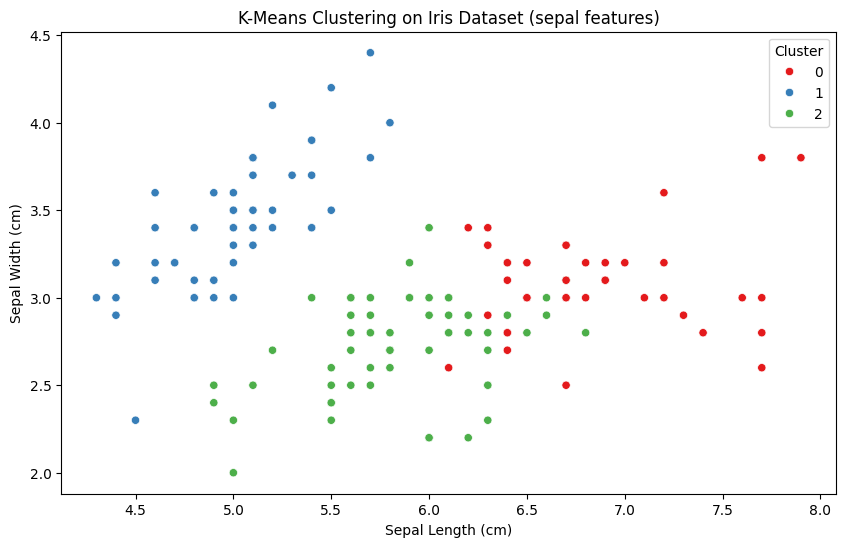

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering on Iris Dataset (sepal features)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.show()

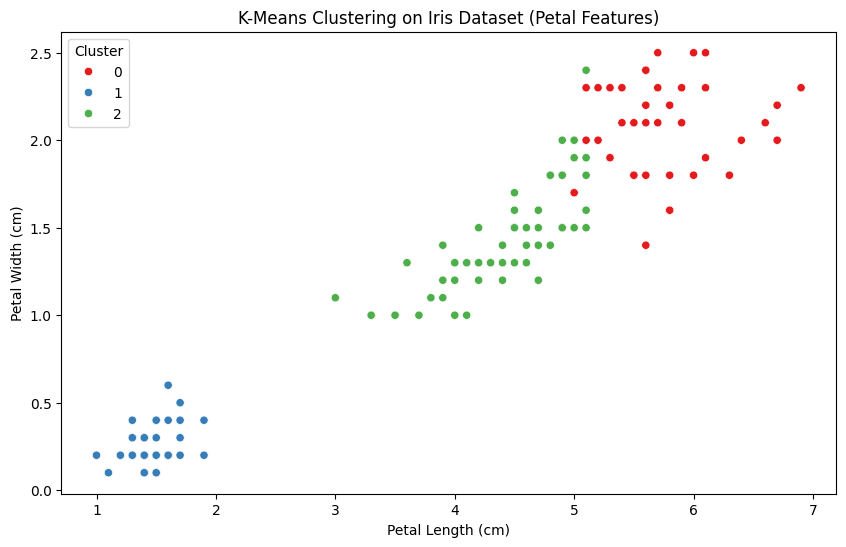

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering on Iris Dataset (Petal Features)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')
plt.show()

In [16]:
#PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/mnist_train.csv")
print("Shape of df:", df.shape)

Shape of df: (47049, 785)


In [17]:
df=pd.read_csv("/content/mnist_train.csv")
print(df.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [18]:
labels=df['label']
data=df.drop("label",axis='columns')
print("labels.shape:",labels.shape)
print("data.shape:",data.shape)



labels.shape: (60000,)
data.shape: (60000, 784)


In [19]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(60000, 784)


In [20]:
sample_data=standardized_data
cov_matrix=np.matmul(sample_data.T,sample_data)
print("The shape of variance matrix=", cov_matrix.shape)

The shape of variance matrix= (784, 784)


In [21]:
from scipy.linalg import eigh
value,vectors=eigh(cov_matrix,eigvals=(782,783))
print(vectors.shape)
vectors=vectors.T
print("Updated shape of eign vectors=", vectors.shape)

(784, 2)
Updated shape of eign vectors= (2, 784)


In [28]:
new_coordinates = np.matmul(sample_data, vectors.T)
print("new_coordinates:", vectors.T.shape, " X ", sample_data.shape, " = ",new_coordinates.shape)

new_coordinates: (784, 2)  X  (60000, 784)  =  (60000, 2)


In [41]:
import pandas as pd
labels_reshaped = labels.reshape(-1, 1)
new_coordinates_2d = new_coordinates[:, :2]
new_coordinates = np.hstack((new_coordinates_2d, labels_reshaped))
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.814790      -0.922159    5.0
1      -7.754403       8.708977    0.0
2       9.431338       2.328389    4.0
3      -3.746318      -6.582173    1.0
4       3.133297      -5.183251    9.0


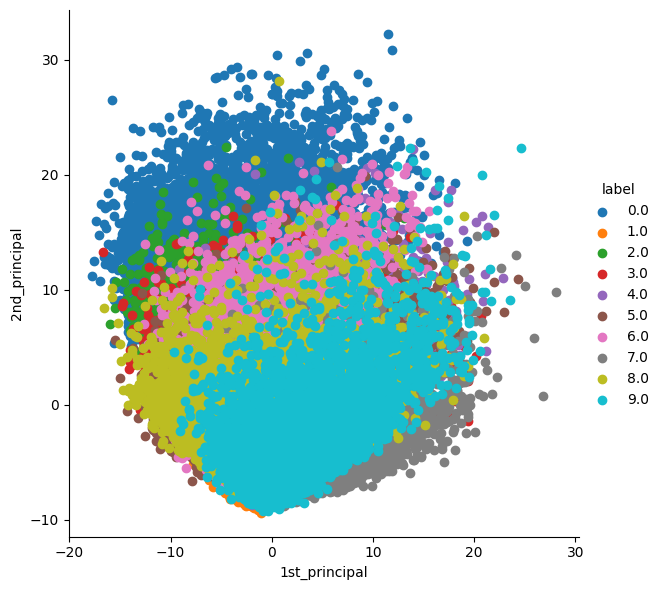

In [47]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()